In [753]:
#main
import pandas as pd
import numpy as np

#plot
import seaborn as sns
from matplotlib import pyplot as plt

#dop
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

#metric
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

#test
from collections import Counter

In [577]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TASK = 'csv/test.csv'

In [578]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
task = pd.read_csv(PATH_TO_TASK, index_col='PassengerId')

In [579]:
task.info()
task.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [580]:
y_train_mean = train['Survived']

In [581]:
df = pd.concat([train.drop('Survived', axis=1), task])

In [582]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Зависимость выживаемости от признаков
---

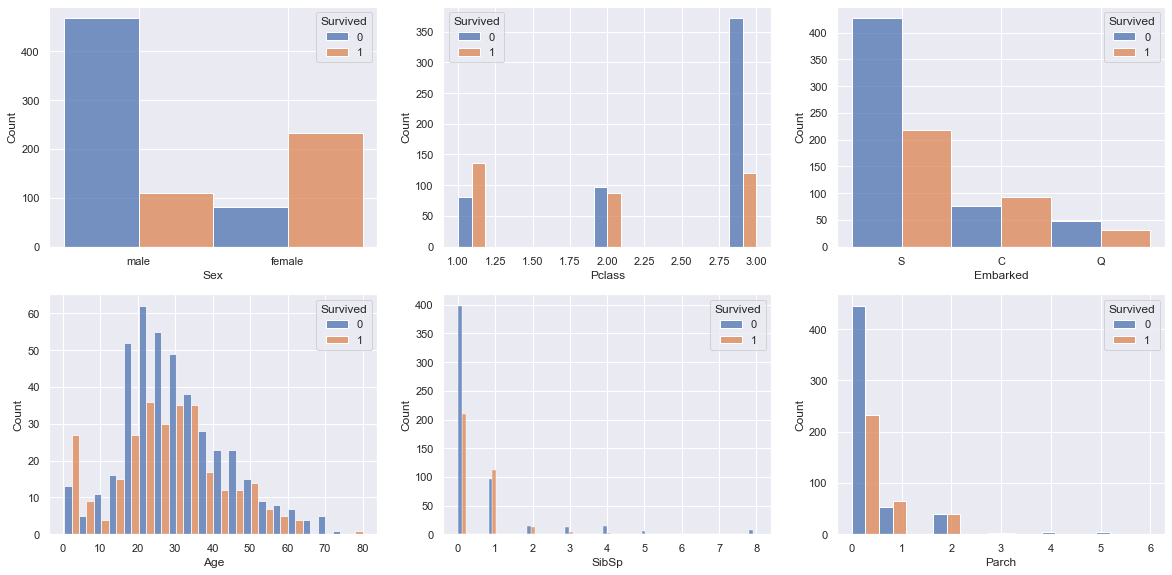

In [583]:
plt.figure(figsize = [20, 15])
plt.subplot(3, 3, 1)
sns.histplot(data = train, x = train['Sex'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 2)
sns.histplot(data = train, x = train['Pclass'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 3)
sns.histplot(data = train, x = train['Embarked'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 4)
sns.histplot(data = train, x = train['Age'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 5)
sns.histplot(data = train, x = train['SibSp'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 6)
sns.histplot(data = train, x = train['Parch'], hue = train['Survived'], multiple = 'dodge')
plt.plot();

способ вытянуть значения из str переменной

In [584]:
df['Title'] = df['Name'].str.extract(' ([A-z]+)\.') 

---

In [585]:
df.replace({'male' :0, 'female' :1}, inplace=True)

In [586]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


Заполнение пропусков признака 'Age'
---
---
Одной медианной по всей выборке нельзя это сильно изменит параметры нормального распределения

In [587]:
index_nan_age = list(df['Age'][df['Age'].isnull()].index)

for i in index_nan_age:
    age_med = np.nanmedian(df['Age'][(df['Sex'] == df.loc[i]['Sex']) & (df["Pclass"] == df.loc[i]['Pclass'])])
    df.loc[i, 'Age'] = age_med

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


In [588]:
test_age = train.copy()

In [589]:
test_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [590]:
for i in list(df[df.index <= test_age.index[-1]].index):
    test_age.loc[i, 'Age'] = df.loc[i, 'Age']

[]

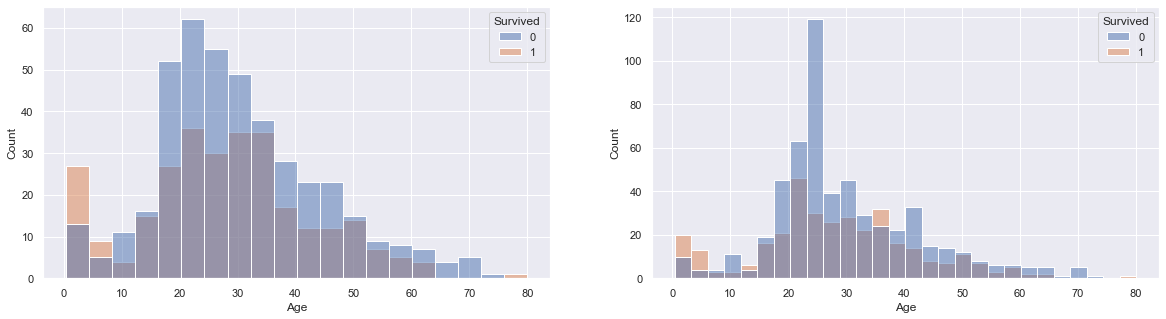

In [591]:
plt.figure(figsize = [20, 5])
plt.title('Сравнение до после заполнение nan')
plt.subplot(1, 2, 2)
sns.histplot(data = test_age, x = test_age['Age'], hue = test_age['Survived'], multiple = 'layer')
plt.subplot(1, 2, 1)
sns.histplot(data = train, x = train['Age'], hue = train['Survived'], multiple = 'layer')
plt.plot()

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

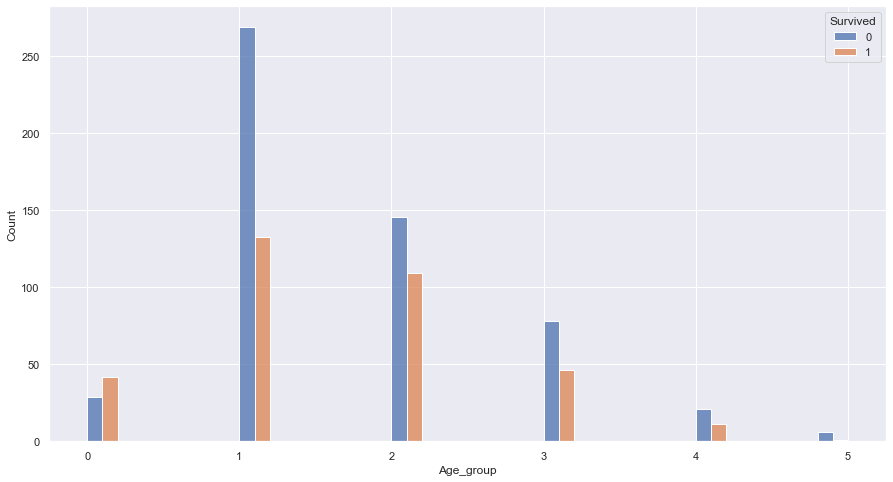

In [592]:
test_age['Age_group'] = test_age['Age'].map(lambda age: int(age // 14))
sns.histplot(data = test_age, x = test_age['Age_group'], hue = test_age['Survived'], multiple = 'dodge')

---

---

In [593]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [594]:
df['Age_group'] = df['Age'].map(lambda age: int(age // 14))

---


Работа с 'Title'
---

In [595]:
test_age['Title'] = df[df.index <= test_age.index[-1]]['Title']

<AxesSubplot:xlabel='Title', ylabel='Count'>

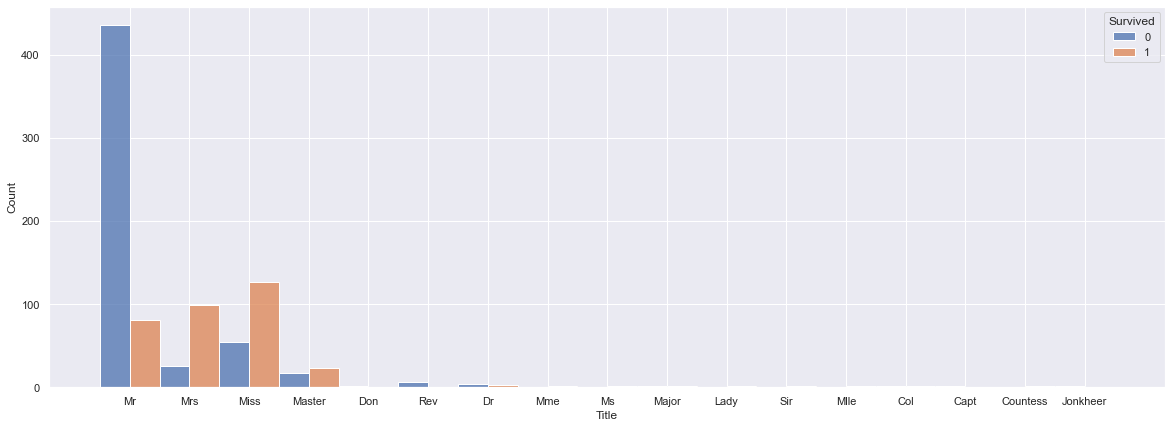

In [596]:
plt.figure(figsize = [20, 7])
sns.histplot(data = test_age, x = test_age['Title'], hue = test_age['Survived'], multiple = 'dodge')

In [597]:
test_age.groupby('Title').mean()['Survived'].sort_values()

Title
Capt        0.000000
Don         0.000000
Jonkheer    0.000000
Rev         0.000000
Mr          0.156673
Dr          0.428571
Col         0.500000
Major       0.500000
Master      0.575000
Miss        0.697802
Mrs         0.792000
Mlle        1.000000
Mme         1.000000
Countess    1.000000
Ms          1.000000
Lady        1.000000
Sir         1.000000
Name: Survived, dtype: float64

In [598]:
df['Title'].replace(['Dr', 'Col', 'Major', 'Rev', 'Jonkheer', 'Don', 'Capt'], 'Mr', inplace=True)
df['Title'].replace(['Sir'], 'Master', inplace=True)
df['Title'].replace(['Lady', 'Ms', 'Countess', 'Mme', 'Mlle', 'Mrs', 'Dona'], 'Miss', inplace=True)

In [599]:
test_age['Title'].replace(['Dr', 'Col', 'Major', 'Rev', 'Jonkheer', 'Don', 'Capt'], 'Mr', inplace=True)
test_age['Title'].replace(['Sir'], 'Master', inplace=True)
test_age['Title'].replace(['Lady', 'Ms', 'Countess', 'Mme', 'Mlle', 'Mrs', 'Dona'], 'Miss', inplace=True)

In [600]:
test_age.groupby('Title').mean()['Survived']

Title
Master    0.585366
Miss      0.741214
Mr        0.160149
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Title', ylabel='Count'>

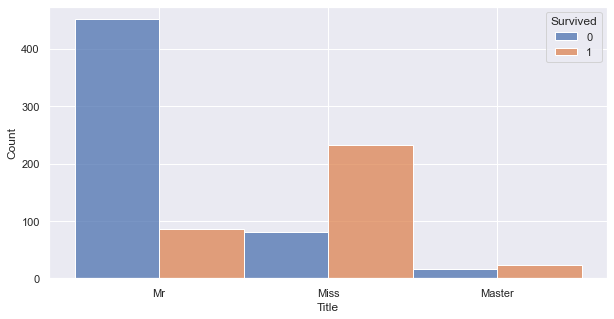

In [601]:
plt.figure(figsize = [10, 5])
sns.histplot(data = test_age, x = test_age['Title'], hue = test_age['Survived'], multiple = 'dodge')

---
Работа с признаком Cabin
---
---

In [602]:
df['Cabin'].str.extract('(\w)').value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
dtype: int64

In [603]:
df['Cabin'] = df['Cabin'].str.extract('(\w)')

In [604]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U' # U is unknown

In [605]:
df['Cabin'].value_counts().sort_index()

A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
U    1014
Name: Cabin, dtype: int64

![img](./ddf3070c69e0450184e35790f72917d1.jpeg)

In [606]:
df[df['Cabin'] == 'T']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
PassengerId,,,,,,,,,,,,
340,1,"Blackwell, Mr. Stephen Weart",0,45.0,0,0,113784,35.5,T,S,Mr,3


In [607]:
df.loc[df['Cabin'] == 'T', 'Cabin'] = 'B'

In [608]:
test = df[df.index <= train.index[-1]].copy()
test['Survived'] = train['Survived']

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

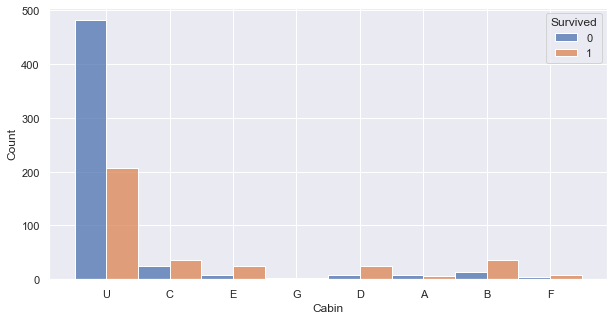

In [609]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test['Cabin'], hue=test['Survived'], multiple='dodge')

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

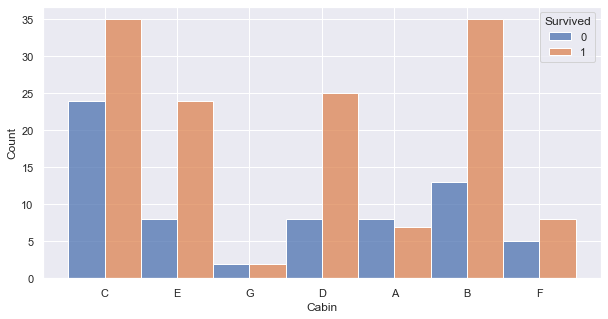

In [610]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test[test['Cabin'] != 'U']['Cabin'], hue=test['Survived'], multiple='dodge')

ЧТО - ТО не как

In [611]:
df.loc[df['Cabin'] != 'U', 'Cabin'] = 'K' # K is Know
test.loc[test['Cabin'] != 'U', 'Cabin'] = 'K' # K is Know


<AxesSubplot:xlabel='Cabin', ylabel='Count'>

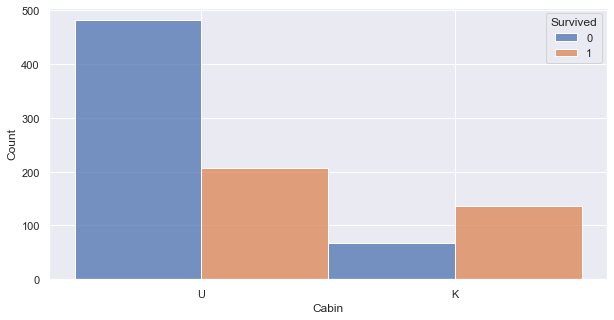

In [612]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test['Cabin'], hue=test['Survived'], multiple='dodge')

---
Работа с признаками SibSp Parch
---
---

In [613]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Name       1309 non-null   object 
 2   Sex        1309 non-null   int64  
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Ticket     1309 non-null   object 
 7   Fare       1308 non-null   float64
 8   Cabin      1309 non-null   object 
 9   Embarked   1307 non-null   object 
 10  Title      1309 non-null   object 
 11  Age_group  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 165.2+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,K,C,Miss,2
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,K,S,Miss,2
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,2


In [614]:
df['Family_size'] = df['Parch'] + df['SibSp'] + 1

In [615]:
test = df[df.index <= train.index[-1]].copy()
test['Survived'] = train['Survived']

<AxesSubplot:xlabel='Family_size', ylabel='Count'>

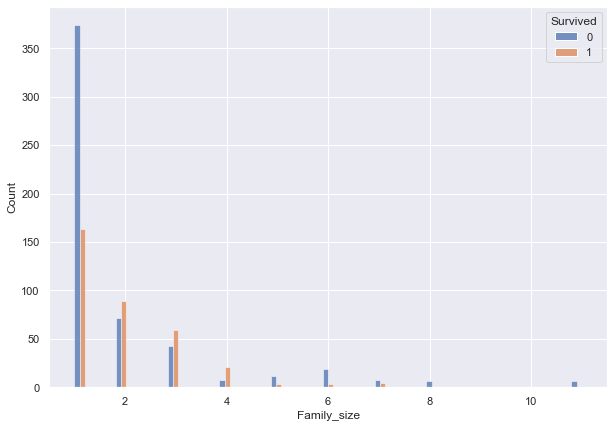

In [616]:
plt.figure(figsize=[10, 7])
sns.histplot(data=test, x=test['Family_size'], hue=test['Survived'], multiple='dodge')

In [617]:
test.groupby('Family_size').mean()['Survived']

Family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [618]:
test['Fam_gp'] = 0
test.loc[test['Family_size'] > 7, 'Fam_gp'] = 0
test.loc[(test['Family_size'] > 4)  & (test['Family_size'] < 8), 'Fam_gp'] = 1
test.loc[(test['Family_size'] > 1)  & (test['Family_size'] < 5), 'Fam_gp'] = 3
test.loc[test['Family_size'] == 1, 'Fam_gp'] = 2

<AxesSubplot:xlabel='Fam_gp', ylabel='Count'>

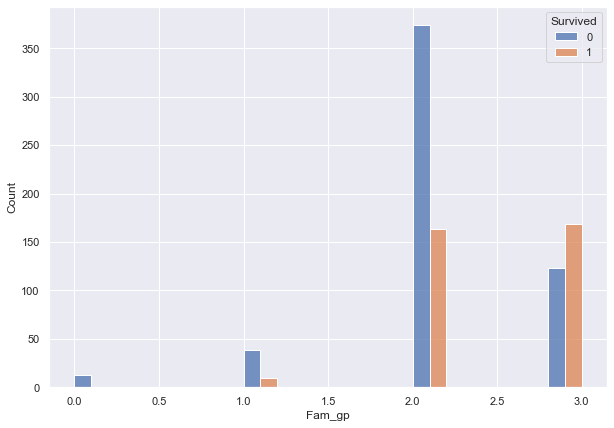

In [619]:
plt.figure(figsize=[10, 7])
sns.histplot(data=test, x=test['Fam_gp'], hue=test['Survived'], multiple='dodge')

In [620]:
df['Fam_gp'] = 0
df.loc[df['Family_size'] > 7, 'Fam_gp'] = 0
df.loc[(df['Family_size'] > 4)  & (df['Family_size'] < 8), 'Fam_gp'] = 1
df.loc[(df['Family_size'] > 1)  & (df['Family_size'] < 5), 'Fam_gp'] = 3
df.loc[df['Family_size'] == 1, 'Fam_gp'] = 2

---
Работа с признаком Ticket
---
___

!!! получить датафрейм ticket с количеством одинаковых признаков для каждого объекта

In [621]:
 df.groupby('Ticket')['Ticket'].transform('count') # Полезный метод

PassengerId
1       1
2       2
3       1
4       2
5       1
       ..
1305    1
1306    3
1307    1
1308    1
1309    3
Name: Ticket, Length: 1309, dtype: int64

In [622]:
test['Identical_tickets'] = test.groupby('Ticket')['Ticket'].transform('count')

<AxesSubplot:xlabel='Identical_tickets', ylabel='Count'>

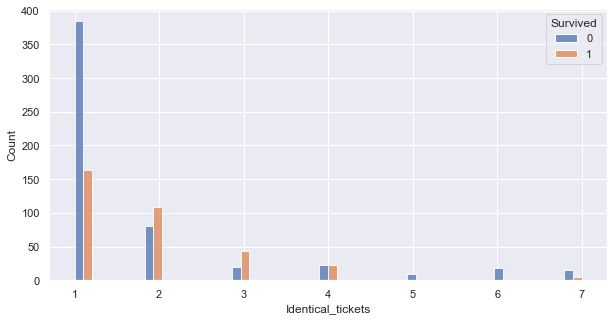

In [623]:
plt.figure(figsize=[10, 5])
sns.histplot(data=test, x=test['Identical_tickets'], hue=test['Survived'], multiple='dodge')

In [624]:
test.groupby('Identical_tickets').mean()['Survived']

Identical_tickets
1    0.297989
2    0.574468
3    0.698413
4    0.500000
5    0.000000
6    0.000000
7    0.238095
Name: Survived, dtype: float64

In [625]:
test['IT'] = 0
test.loc[test['Identical_tickets'] == 1, 'IT'] = 1
test.loc[(test['Identical_tickets'] > 1) & (test['Identical_tickets'] < 5), 'IT'] = 2

<AxesSubplot:xlabel='IT', ylabel='Count'>

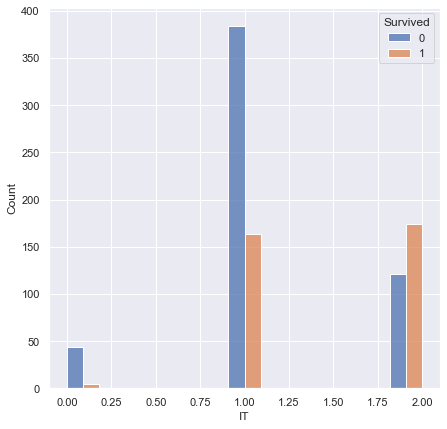

In [626]:
plt.figure(figsize=[7, 7])
sns.histplot(data=test, x=test['IT'], hue=test['Survived'], multiple='dodge')

In [627]:
df['Identical_tickets'] = df.groupby('Ticket')['Ticket'].transform('count')
df['IT'] = 0
df.loc[df['Identical_tickets'] == 1, 'IT'] = 1
df.loc[(df['Identical_tickets'] > 1) & (df['Identical_tickets'] < 5), 'IT'] = 2

In [628]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   Name               1309 non-null   object 
 2   Sex                1309 non-null   int64  
 3   Age                1309 non-null   float64
 4   SibSp              1309 non-null   int64  
 5   Parch              1309 non-null   int64  
 6   Ticket             1309 non-null   object 
 7   Fare               1308 non-null   float64
 8   Cabin              1309 non-null   object 
 9   Embarked           1307 non-null   object 
 10  Title              1309 non-null   object 
 11  Age_group          1309 non-null   int64  
 12  Family_size        1309 non-null   int64  
 13  Fam_gp             1309 non-null   int64  
 14  Identical_tickets  1309 non-null   int64  
 15  IT                 1309 non-null   int64  
dtypes: float64(2), int64(9),

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_size,Fam_gp,Identical_tickets,IT
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,1,2,3,1,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,K,C,Miss,2,2,3,2,2
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,1,2,1,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,K,S,Miss,2,2,3,2,2
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,2,1,2,1,1


---
Работа с признаком Embarked
--
___

In [629]:
test['Identical_tickets'].value_counts()

1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: Identical_tickets, dtype: int64

In [630]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

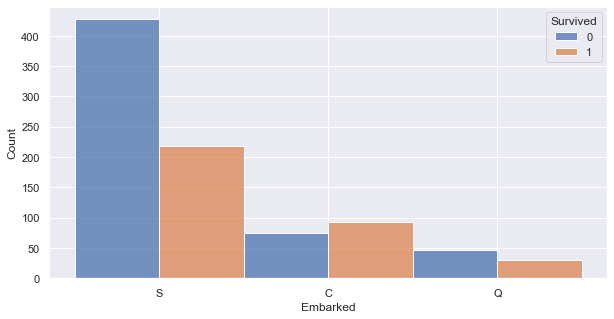

In [631]:
plt.figure(figsize=[10, 5])
sns.histplot(data=test, x=test['Embarked'], hue=test['Survived'], multiple='dodge');
test.groupby('Embarked').mean()['Survived']

In [632]:
test['Emb_gr'] = 0
test.loc[test['Embarked'] == 'C', 'Emb_gr'] = 1

Emb_gr
0    0.344398
1    0.553571
Name: Survived, dtype: float64

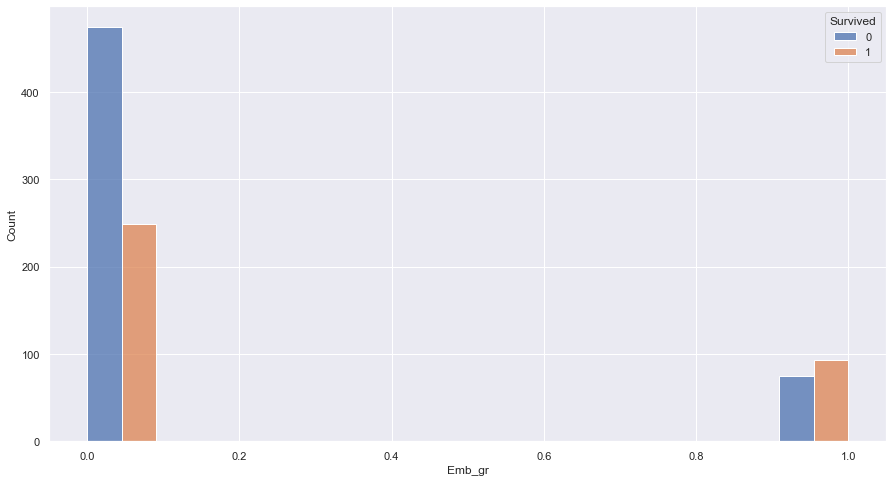

In [633]:
sns.histplot(data=test, x=test['Emb_gr'], hue=test['Survived'], multiple='dodge');
test.groupby('Emb_gr').mean()['Survived']

In [634]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Name               891 non-null    object 
 2   Sex                891 non-null    int64  
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Ticket             891 non-null    object 
 7   Fare               891 non-null    float64
 8   Cabin              891 non-null    object 
 9   Embarked           891 non-null    object 
 10  Title              891 non-null    object 
 11  Age_group          891 non-null    int64  
 12  Family_size        891 non-null    int64  
 13  Survived           891 non-null    int64  
 14  Fam_gp             891 non-null    int64  
 15  Identical_tickets  891 non-null    int64  
 16  IT                 891 non

In [635]:
df['Emb_gr'] = 0
df.loc[df['Embarked'] == 'C', 'Emb_gr'] = 1

In [636]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Name               891 non-null    object 
 2   Sex                891 non-null    int64  
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Ticket             891 non-null    object 
 7   Fare               891 non-null    float64
 8   Cabin              891 non-null    object 
 9   Embarked           891 non-null    object 
 10  Title              891 non-null    object 
 11  Age_group          891 non-null    int64  
 12  Family_size        891 non-null    int64  
 13  Survived           891 non-null    int64  
 14  Fam_gp             891 non-null    int64  
 15  Identical_tickets  891 non-null    int64  
 16  IT                 891 non

---
Работа с признаком Fare
--
___

In [637]:
test['Embarked'].mode()[0]

'S'

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   Name               1309 non-null   object 
 2   Sex                1309 non-null   int64  
 3   Age                1309 non-null   float64
 4   SibSp              1309 non-null   int64  
 5   Parch              1309 non-null   int64  
 6   Ticket             1309 non-null   object 
 7   Fare               1308 non-null   float64
 8   Cabin              1309 non-null   object 
 9   Embarked           1309 non-null   object 
 10  Title              1309 non-null   object 
 11  Age_group          1309 non-null   int64  
 12  Family_size        1309 non-null   int64  
 13  Fam_gp             1309 non-null   int64  
 14  Identical_tickets  1309 non-null   int64  
 15  IT                 1309 non-null   int64  
 16  Emb_gr             1309 

In [639]:
df['Embarked'].mode()[0]

'S'

In [640]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Age_group,Family_size,Fam_gp,Identical_tickets,IT,Emb_gr
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,29.261398,0.498854,0.385027,33.295479,1.614973,1.883881,2.256684,2.101604,1.270435,0.206264
std,0.837836,0.478997,13.218275,1.041658,0.865560,51.758668,0.985346,1.583639,0.611907,1.779832,0.618439,0.404777
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,5.000000,11.000000,3.000000,11.000000,2.000000,1.000000


In [641]:
test['Fare'] = test['Fare'] / test['Identical_tickets']

In [642]:
test['Fare'].describe()

count    891.000000
mean      17.788989
std       21.218157
min        0.000000
25%        7.762500
50%        8.850000
75%       24.288200
max      221.779200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

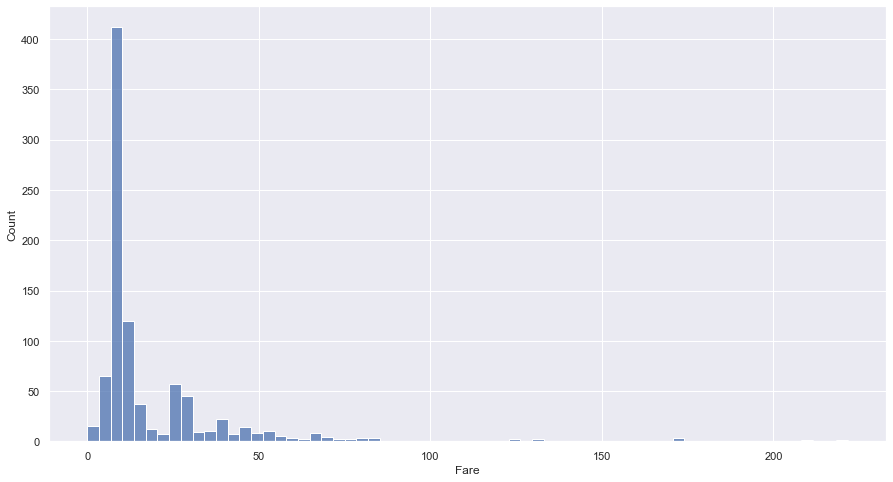

In [643]:
sns.histplot(test['Fare'])

Большое количество по одному значению надо менять по log

In [644]:
test['Fare'] = test['Fare'].map(lambda n: np.log(n) if n > 0 else 0)

In [645]:
df[df['Fare'] == 0] 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_size,Fam_gp,Identical_tickets,IT,Emb_gr
PassengerId,,,,,,,,,,,,,,,,,
180,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,U,S,Mr,2,1,2,4,2,0
264,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0,K,S,Mr,2,1,2,1,1,0
272,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,U,S,Mr,1,1,2,4,2,0
278,2,"Parkes, Mr. Francis ""Frank""",0,29.5,0,0,239853,0.0,U,S,Mr,2,1,2,3,2,0
303,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,U,S,Mr,1,1,2,4,2,0
414,2,"Cunningham, Mr. Alfred Fleming",0,29.5,0,0,239853,0.0,U,S,Mr,2,1,2,3,2,0
467,2,"Campbell, Mr. William",0,29.5,0,0,239853,0.0,U,S,Mr,2,1,2,3,2,0
482,2,"Frost, Mr. Anthony Wood ""Archie""",0,29.5,0,0,239854,0.0,U,S,Mr,2,1,2,1,1,0
598,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0,U,S,Mr,3,1,2,4,2,0


<AxesSubplot:xlabel='Fare', ylabel='Count'>

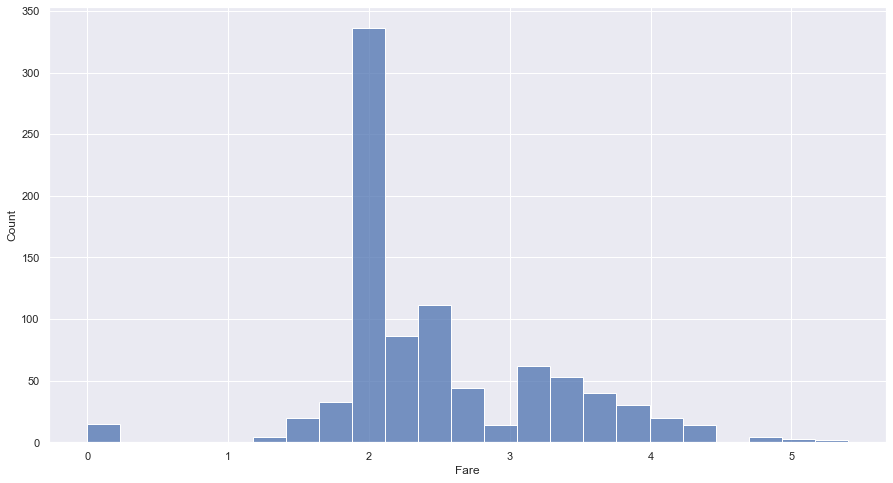

In [646]:
sns.histplot(test['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

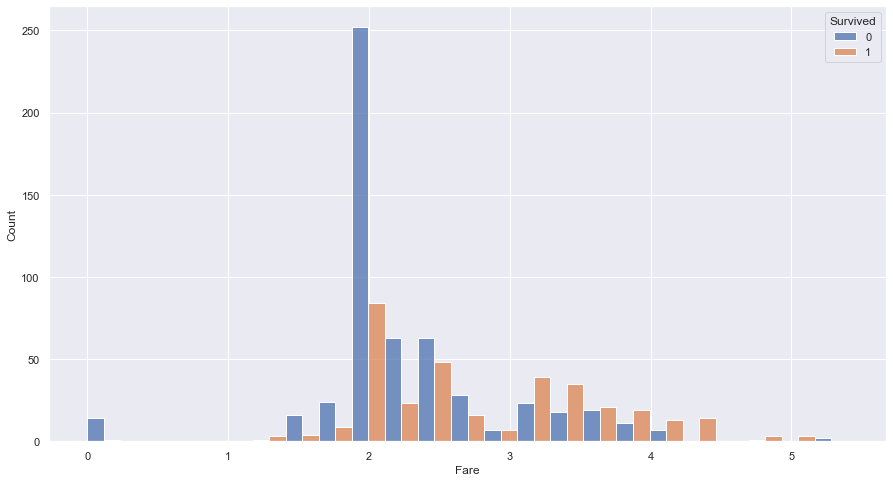

In [647]:
sns.histplot(data=test, x=test['Fare'], hue=test['Survived'], multiple='dodge')

In [648]:
df['Fare'] = df['Fare'] / df['Identical_tickets']
df['Fare'] = df['Fare'].map(lambda n: np.log(n) if n > 0 else 0)

---
С признаками все
---
---

In [649]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   Name               1309 non-null   object 
 2   Sex                1309 non-null   int64  
 3   Age                1309 non-null   float64
 4   SibSp              1309 non-null   int64  
 5   Parch              1309 non-null   int64  
 6   Ticket             1309 non-null   object 
 7   Fare               1309 non-null   float64
 8   Cabin              1309 non-null   object 
 9   Embarked           1309 non-null   object 
 10  Title              1309 non-null   object 
 11  Age_group          1309 non-null   int64  
 12  Family_size        1309 non-null   int64  
 13  Fam_gp             1309 non-null   int64  
 14  Identical_tickets  1309 non-null   int64  
 15  IT                 1309 non-null   int64  
 16  Emb_gr             1309 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_size,Fam_gp,Identical_tickets,IT,Emb_gr
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,U,S,Mr,1,2,3,1,1,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3.573515,K,C,Miss,2,2,3,2,2,1
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,1,2,1,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.279030,K,S,Miss,2,2,3,2,2,0
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,U,S,Mr,2,1,2,1,1,0


In [650]:
test.drop(columns=['Name', 'Ticket', 'Title'], axis=1, inplace=True)
df.drop(columns=['Name', 'Ticket', 'Title'], axis=1, inplace=True)

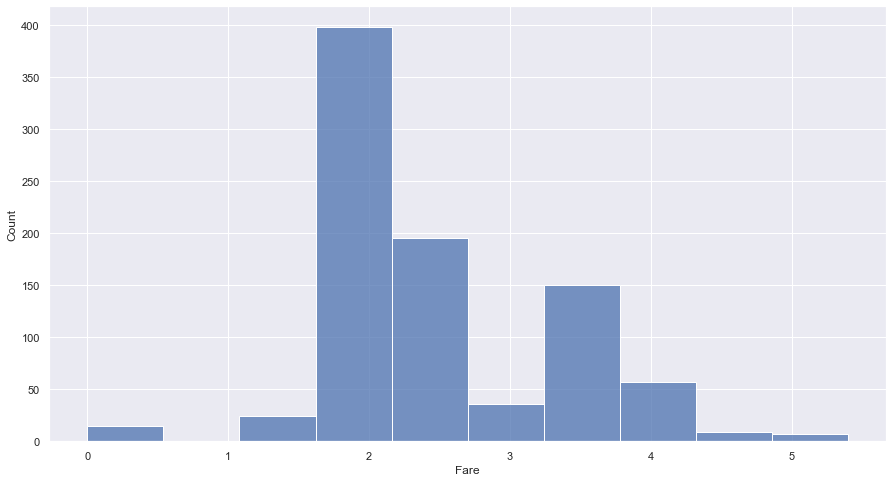

In [651]:
sns.histplot(data = test, x = 'Fare', bins = 10);

In [652]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,Family_size,Survived,Fam_gp,Identical_tickets,IT,Emb_gr
PassengerId,,,,,,,,,,,,,,,
1,3,0,22.0,1,0,1.981001,U,S,1,2,0,3,1,1,0
2,1,1,38.0,1,0,4.266662,K,C,2,2,1,3,1,1,1
3,3,1,26.0,0,0,2.070022,U,S,1,1,1,2,1,1,0
4,1,1,35.0,1,0,3.279030,K,S,2,2,1,3,2,2,0
5,3,0,35.0,0,0,2.085672,U,S,2,1,0,2,1,1,0


<AxesSubplot:>

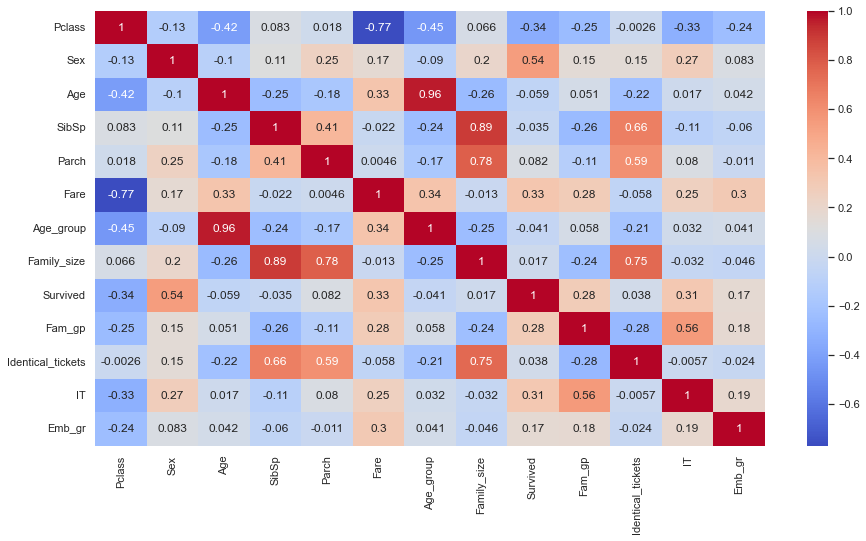

In [653]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test.corr(), annot=True, cmap='coolwarm')

---
Доработка признаков
---
---

In [654]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,Family_size,Fam_gp,Identical_tickets,IT,Emb_gr
PassengerId,,,,,,,,,,,,,,
1,3,0,22.0,1,0,1.981001,U,S,1,2,3,1,1,0
2,1,1,38.0,1,0,3.573515,K,C,2,2,3,2,2,1
3,3,1,26.0,0,0,2.070022,U,S,1,1,2,1,1,0
4,1,1,35.0,1,0,3.279030,K,S,2,2,3,2,2,0
5,3,0,35.0,0,0,2.085672,U,S,2,1,2,1,1,0


In [729]:
coll_tr = ['Age', 'SibSp', 'Parch', 'Family_size']
ss = StandardScaler()
test[coll_tr] = ss.fit_transform(test[coll_tr])

In [656]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_group,Family_size,Survived,Fam_gp,Identical_tickets,IT,Emb_gr
PassengerId,,,,,,,,,,,,,,,
1,3,0,-0.539232,0.432793,-0.473674,1.981001,U,S,1,0.059160,0,3,1,1,0
2,1,1,0.661032,0.432793,-0.473674,4.266662,K,C,2,0.059160,1,3,1,1,1
3,3,1,-0.239166,-0.474545,-0.473674,2.070022,U,S,1,-0.560975,1,2,1,1,0
4,1,1,0.435982,0.432793,-0.473674,3.279030,K,S,2,0.059160,1,3,2,2,0
5,3,0,0.435982,-0.474545,-0.473674,2.085672,U,S,2,-0.560975,0,2,1,1,0


<AxesSubplot:>

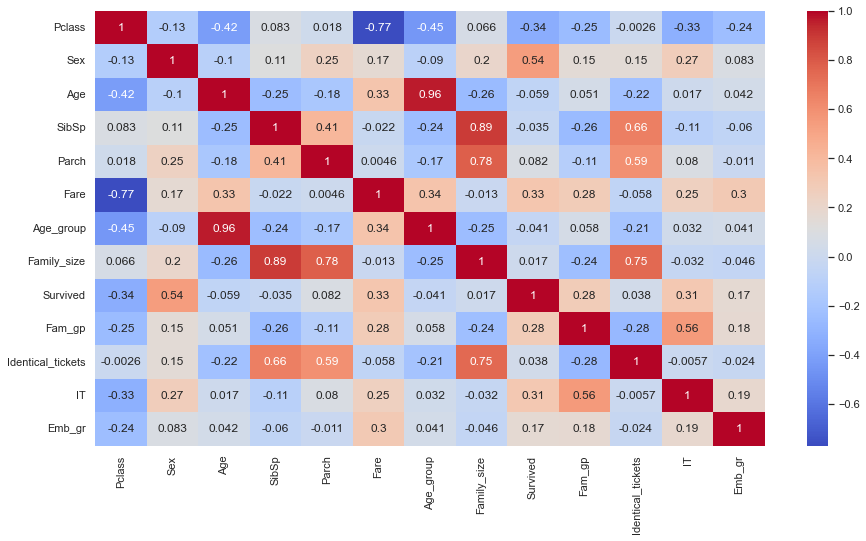

In [657]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test.corr(), annot=True, cmap='coolwarm')

In [658]:
test.groupby('Age_group', sort=True).mean()['Survived']

Age_group
0    0.591549
1    0.330846
2    0.427451
3    0.370968
4    0.343750
5    0.142857
Name: Survived, dtype: float64

In [659]:
test['Child'] = 0
test.loc[test['Age_group'] == 0, 'Child'] = 1
test['Old'] = 0
test.loc[test['Age_group'] == 5, 'Old'] = 1
test.loc[(test['Age_group'] > 0) & (test['Age_group'] < 5), 'Age_group'] = 1
test.loc[test['Age_group'] != 1, 'Age_group'] = 0

<AxesSubplot:>

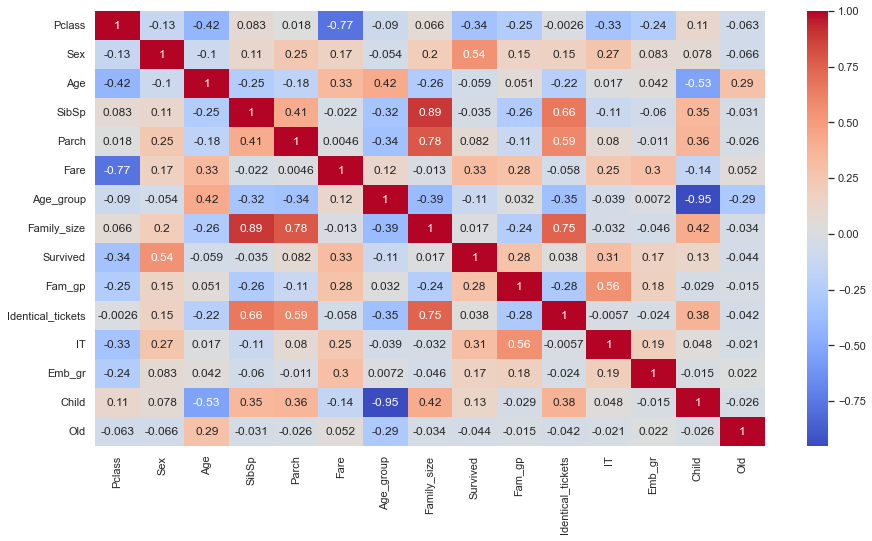

In [660]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

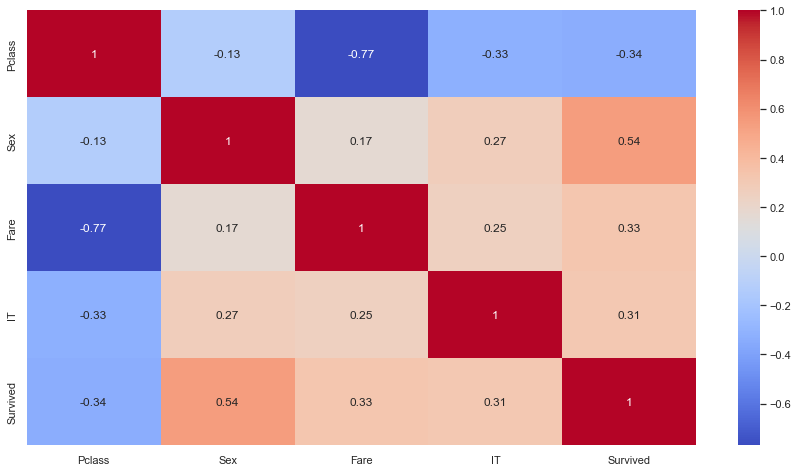

In [731]:
col = ['Pclass', 'Sex', 'Fare', 'Cabin', 'IT', 'Survived']
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test[col].corr(), annot=True, cmap='coolwarm')

In [662]:
col = ['Pclass', 'Sex', 'Fare', 'Cabin', 'IT', 'Child', 'Survived']
test[col].head()

,Pclass,Sex,Fare,Cabin,Age_group,IT,Emb_gr,Child,Survived
PassengerId,,,,,,,,,
1,3,0,1.981001,U,1,1,0,0,0
2,1,1,4.266662,K,1,1,1,0,1
3,3,1,2.070022,U,1,1,0,0,1
4,1,1,3.279030,K,1,2,0,0,1
5,3,0,2.085672,U,1,1,0,0,0


In [663]:
le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])

df['Child'] = 0
df.loc[df['Age_group'] == 0, 'Child'] = 1
df.loc[(df['Age_group'] > 0) & (df['Age_group'] < 5), 'Age_group'] = 1
df.loc[df['Age_group'] != 1, 'Age_group'] = 0

In [664]:
col.remove('Survived')
df_1 = df[col].copy()

In [665]:
train_1, task_1 = df_1[:len(train)], df_1[len(train):]

In [666]:
train_1.info()
train_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    int64  
 2   Fare       891 non-null    float64
 3   Cabin      891 non-null    int64  
 4   Age_group  891 non-null    int64  
 5   IT         891 non-null    int64  
 6   Emb_gr     891 non-null    int64  
 7   Child      891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


,Pclass,Sex,Fare,Cabin,Age_group,IT,Emb_gr,Child
PassengerId,,,,,,,,
1,3,0,1.981001,1,1,1,0,0
2,1,1,3.573515,0,1,2,1,0
3,3,1,2.070022,1,1,1,0,0
4,1,1,3.279030,0,1,2,0,0
5,3,0,2.085672,1,1,1,0,0


---
ML ML ML ML ML
--
---

In [667]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
#     plt.figure(figsize=(8,8))
    
#     sns.scatterplot(x=pred_values, y=true_values)
#     plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
#     plt.xlabel('Predicted values')
#     plt.ylabel('True values')
#     plt.title('True vs Predicted values')
    
#     if save == True:
#         plt.savefig(REPORTS_FILE_PATH + 'report.png')
#     plt.show()

In [715]:
X_train, X_test, y_train, y_test = train_test_split(train_1, y_train_mean, test_size=0.33, random_state=21)

In [718]:
gb_model = GradientBoostingClassifier(
                                     max_depth=7,
                                     min_samples_leaf=10, 
                                     n_estimators=500)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)

evaluate_preds(y_train, y_train_preds)

R2:	0.708
RMSE:	0.262
MSE:	0.069


In [717]:
param = [
    {'n_estimators': [100, 200, 300, 400, 450, 500], 
     'max_depth': [3, 4, 6, 8, 10, 12], 
     'max_leaf_nodes': [15, 20, 25]}, 
]


rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rf.fit(X_train, y_train)

rf_best = gs_rf.best_estimator_
gs_rf.best_estimator_, gs_rf.score(X_test, y_test), gs_rf.score(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


(RandomForestClassifier(max_depth=8, max_leaf_nodes=25, n_estimators=400),
 0.823728813559322,
 0.8825503355704698)

In [742]:
param_gb = [
    {
        'n_estimators': range(12, 36, 4), 
        'max_depth': range(3, 20, 4),
        'max_leaf_nodes': range(8, 28, 4)
    }
]

gb = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb, param_gb, cv = 5, n_jobs = -1, verbose = 1)
gs_gb.fit(X_train, y_train)

gs_gb.best_estimator_, gs_gb.score(X_test, y_test), gs_gb.score(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


(GradientBoostingClassifier(max_depth=15, max_leaf_nodes=16, n_estimators=32),
 0.8169491525423729,
 0.9093959731543624)

---
ANSWER
---
---

In [751]:
y_answer_1 = gs_gb.predict(task_1)
output = pd.DataFrame({'PassengerId': task_1.index, 'Survived': y_answer_1})
output.to_csv('submission.csv', index=False)

/Users/igarg/.brew/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age_group
- Emb_gr
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but GradientBoostingClassifier is expecting 6 features as input.

---


In [755]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Age_group', 'Family_size', 'Fam_gp', 'Identical_tickets', 'IT',
       'Emb_gr', 'Child'],
      dtype='object')

<AxesSubplot:>

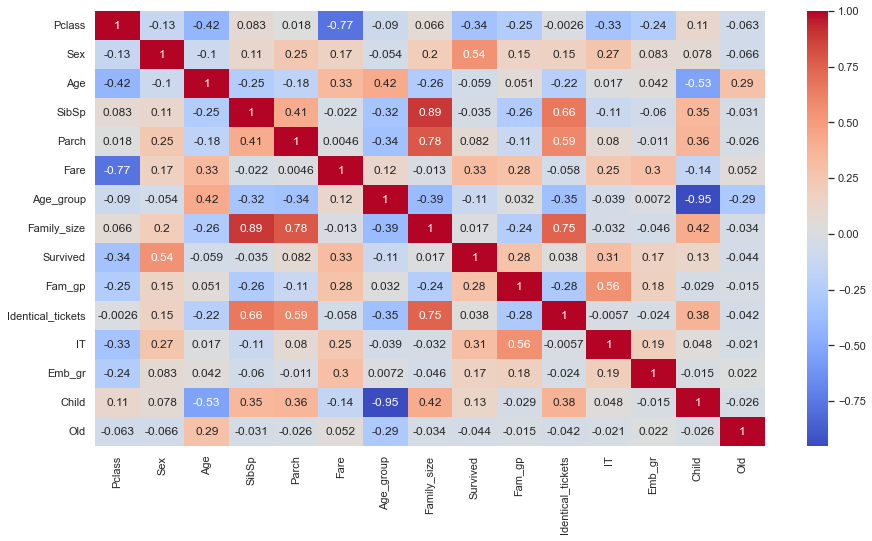

In [756]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test.corr(), annot=True, cmap='coolwarm')

In [772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             1309 non-null   int64  
 1   Sex                1309 non-null   int64  
 2   Age                1309 non-null   float64
 3   SibSp              1309 non-null   float64
 4   Parch              1309 non-null   float64
 5   Fare               1309 non-null   float64
 6   Cabin              1309 non-null   int64  
 7   Embarked           1309 non-null   object 
 8   Age_group          1309 non-null   int64  
 9   Family_size        1309 non-null   float64
 10  Fam_gp             1309 non-null   int64  
 11  Identical_tickets  1309 non-null   int64  
 12  IT                 1309 non-null   int64  
 13  Emb_gr             1309 non-null   int64  
 14  Child              1309 non-null   int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 195.9+ KB


In [769]:
coll_tr = ['Age', 'SibSp', 'Parch', 'Family_size']
ss = StandardScaler()
df[coll_tr] = ss.fit_transform(df[coll_tr])

------

In [794]:
col = ['Pclass', 'Sex', 'Fare', 'Cabin', 'IT', 'Emb_gr', 'Fam_gp']
df_2 = df[col].copy()
train_2, task_2 = df_2[:len(train)], df_2[len(train):]

In [778]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    int64  
 2   Fare       891 non-null    float64
 3   Cabin      891 non-null    int64  
 4   IT         891 non-null    int64  
 5   Child      891 non-null    int64  
 6   Age_group  891 non-null    int64  
 7   Emb_gr     891 non-null    int64  
 8   Fam_gp     891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.6 KB


In [795]:
X_train, X_test, y_train, y_test = train_test_split(train_2, y_train_mean, test_size=0.33, random_state=21)

In [781]:
param = [
    {'n_estimators': range(12, 30, 2), 
     'max_depth': range(5, 15, 2), 
     'max_leaf_nodes': range(15, 25, 2)}, 
]


rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rf.fit(X_train, y_train)

rf_best = gs_rf.best_estimator_
gs_rf.best_estimator_, gs_rf.score(X_test, y_test), gs_rf.score(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


(RandomForestClassifier(max_depth=11, max_leaf_nodes=21, n_estimators=20),
 0.7932203389830509,
 0.87248322147651)

In [788]:
param_gb = [
    {'n_estimators': range(12, 36, 4), 
     'max_depth': range(8, 24, 4),
     'max_leaf_nodes': range(8, 28, 4),
    }
]

gb = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb, param_gb, cv = 5, n_jobs = -1, verbose = 1)
gs_gb.fit(X_train, y_train)

gs_gb.best_estimator_, gs_gb.score(X_test, y_test), gs_gb.score(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


(GradientBoostingClassifier(max_depth=8, max_leaf_nodes=20, n_estimators=28),
 0.8271186440677966,
 0.9177852348993288)

In [796]:
param = [
    {'n_estimators': range(8, 28, 4), 
     'max_depth': range(24, 48, 4),
     'max_leaf_nodes': range(20, 48, 4),
    }
]

et = ExtraTreesClassifier()
gs_et = GridSearchCV(et, param, cv = 5, n_jobs = -1, verbose = 1)
gs_et.fit(X_train, y_train)

et_best = gs_et.best_estimator_
gs_et.best_estimator_, gs_et.score(X_test, y_test), gs_et.score(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


(ExtraTreesClassifier(max_depth=24, max_leaf_nodes=44, n_estimators=24),
 0.8101694915254237,
 0.8691275167785235)

In [797]:
y_answer_2 = gs_et.predict(task_2)
output = pd.DataFrame({'PassengerId': task_2.index, 'Survived': y_answer_2})
output.to_csv('submission.csv', index=False)